In [1]:
################################################
#all the needed imports
#

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import copy

import cv2 

key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)

#set maximum wanted resolution - if not reachable, set the closest value
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
webcam.set(cv2.CAP_PROP_GIGA_FRAME_HEIGH_MAX, 1080)

width = webcam.get(cv2.CAP_PROP_FRAME_WIDTH)
height = webcam.get(cv2.CAP_PROP_FRAME_HEIGHT)
print(width, height)


while True:
    try:
        check, frame = webcam.read()
        print(check) #prints true as long as the webcam is running
        print(frame) #prints matrix values of each framecd 
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'): 
            cv2.imwrite(filename='saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            print("Processing image...")
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
            print("Converting RGB image to grayscale...")
            gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
            print("Converted RGB image to grayscale...")
            print("Resizing image to 28x28 scale...")
            img_ = cv2.resize(gray,(28,28))
            print("Resized...")
            img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
            print("Image saved!")
        
            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
        
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break
    

In [2]:
webcam = cv2.VideoCapture(0)
key = cv2. waitKey(1)

#set maximum wanted resolution - if not reachable, set the closest value
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
webcam.set(cv2.CAP_PROP_GIGA_FRAME_HEIGH_MAX, 720)

width = webcam.get(cv2.CAP_PROP_FRAME_WIDTH)
height = webcam.get(cv2.CAP_PROP_FRAME_HEIGHT)

print("CURRENT RESOLUTION: ", width, ":", height)

arr = []
counter = 0

MAX_IMG = 2

while True:
    try:
        check, frame = webcam.read()
        #print(frame)
        #print(check)
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if(key == ord('q')):
            print("Turning off camera.")
            webcam.release()            #turning off camera
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
        elif(key == ord('c')):            #capture 1 frame
            counter = 0
            #arr = np.array(frame)
            print("start")

            #webcam.release()
            #cv2.destroyAllWindows()

            #print(arr.shape)

            #color conversion
            #img = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)

            #img = Image.fromarray(arr, "RGB")

            # fig, axs = plt.subplots(1, 2, figsize=[20,10])
            # axs[0].imshow(arr)
            # axs[1].imshow(img)
            # plt.show()
        
        if(counter >= 0 and counter < MAX_IMG*2+24):
            #print("next", counter)
            if(counter >= 24):
                arr.append(np.array(frame))
                print("appended", counter)
            #webcam.release()
            counter += 1
            
        elif(counter == MAX_IMG*2+24):
            webcam.release()
            cv2.destroyAllWindows()
            break

    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

CURRENT RESOLUTION:  1280.0 : 720.0
appended 24
appended 25
appended 26
appended 27


In [3]:
img = copy.deepcopy(arr)

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
0 done
1 done
2 done
3 done


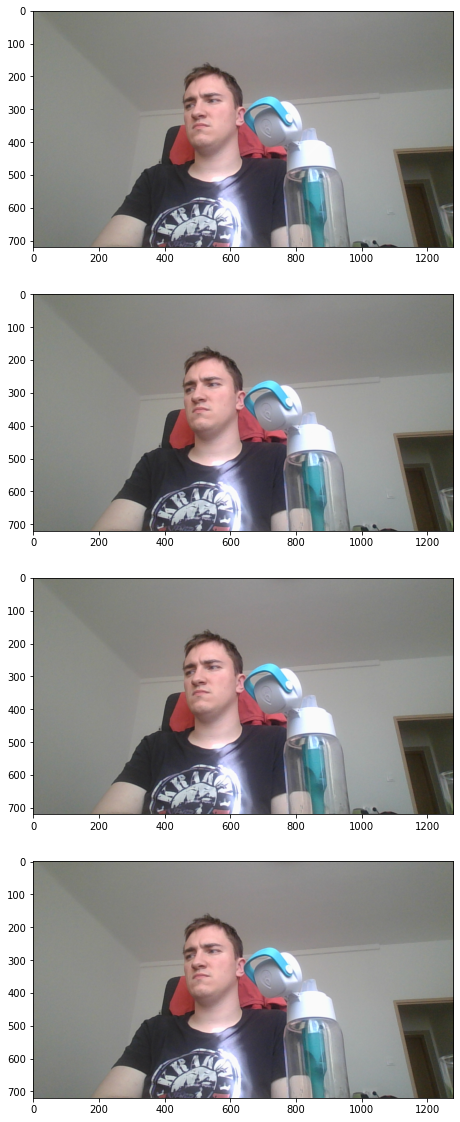

In [4]:
for i in img:
    print(i.shape)

#print(len(img[0]))



for i in range(MAX_IMG*2):
    img[i] = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
    print(i, "done")

########################################
# COLOR CHECKING
#

# fig, axs = plt.subplots(4, 1, figsize=[20,20])
# temp_R = np.zeros_like(img[3])
# temp_G = np.zeros_like(img[3])
# temp_B = np.zeros_like(img[3])
# temp_R[:,:,0] = img[3][:,:,0]
# temp_G[:,:,1] = img[3][:,:,1]
# temp_B[:,:,2] = img[3][:,:,2]

# axs[0].imshow(img[3])
# axs[1].imshow(temp_R)
# axs[2].imshow(temp_G)
# axs[3].imshow(temp_B)

#
#########################################

counter = 0


for i in img:
    axs[counter].imshow(i)
    counter += 1


plt.show()

In [41]:
#set length of whole array in 1D
len_R = img[0][:,:,0].size
#print(len_R)

m = len_R

arr1D_R1 = []
arr1D_R2 = []
arr1D_G1 = []
arr1D_G2 = []
arr1D_B1 = []
arr1D_B2 = []

redXOR = []
greenXOR = []
blueXOR = []

#for each image pair
for i in range(0, MAX_IMG*2, 2):
    # for each RED pixel
    arr1D_R1.append(img[i][:,:,0].flatten())
    arr1D_R2.append(np.flip(img[i+1][:,:,0].flatten()))
    # for each GREEN pixel
    arr1D_G1.append(img[i][:,:,1].flatten())
    arr1D_G2.append(np.flip(img[i+1][:,:,1].flatten()))
    # for each BLUE pixel
    arr1D_B1.append(img[i][:,:,2].flatten())
    arr1D_B2.append(np.flip(img[i+1][:,:,2].flatten()))

for i in range(MAX_IMG):
    # XOR red values of pair images
    redXOR.append(arr1D_R1[i] ^ arr1D_R2[i])
    print("red_XOR_{}".format(i), redXOR[i])

    # XOR green values of pair images
    greenXOR.append(arr1D_G1[i] ^ arr1D_G2[i])

    # XOR blue values of pair images
    blueXOR.append(arr1D_B1[i] ^ arr1D_B2[i])
    
# create Z array of R^, G^, B^ array elements interlaced as Z = {r^0, g^0, b^0, r^1, g^1, b^1, ..., r^n-1, g^n-1, b^n-1}, where length = 3n
Z = []

for i in range(MAX_IMG):
    aux = []
    #iterate with "it" over all redXOR/greenXOR/blueXOR arrays AND concatenate each element at [it] position as in pattern shown ^here^
    for it in range(len(redXOR[i])):
        aux.append(redXOR[i][it])
        aux.append(greenXOR[i][it])
        aux.append(blueXOR[i][it])
    Z.append(aux)


print(len(redXOR[0]))



# arr1D_R2 = img[i][:,:,0].flatten()

    
# print("REG ", end="")
# for i in range(3):
#     print(arr1D_R1[i], end=" ")
# print(" ... ", end="")
# for i in reversed(range(3)):
#     print(arr1D_R1[len(arr1D_R1)-i-1], end=" ")
# print("")
# print("FLAT", arr1D_R2)

# print("REVERSED:", np.flip(arr1D_R2))

red_XOR_0 [194 199 201 ... 202 196 194]
red_XOR_1 [204 192 201 ... 200 192 193]
921600


In [37]:
imgXOR = np.zeros_like(img[0])
imgXOR[:,:,0] = redXOR[0]
imgXOR[:,:,1] = greenXOR[0]
imgXOR[:,:,2] = blueXOR[0]

fig, axs = plt.subplots(1, 1, figsize=[20,20])
axs.imshow(imgXOR)



ValueError: could not broadcast input array from shape (921600,) into shape (720,1280)